In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wine_df = pd.read_csv('wine_dataframe.csv')

In [3]:
wine_df = wine_df.dropna(how="any")

In [4]:
wine_df.head()

,country,description,designation,points,price,province,region_1,title,variety,winery
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70175 entries, 3 to 129970
Data columns (total 10 columns):
country        70175 non-null object
description    70175 non-null object
designation    70175 non-null object
points         70175 non-null int64
price          70175 non-null float64
province       70175 non-null object
region_1       70175 non-null object
title          70175 non-null object
variety        70175 non-null object
winery         70175 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 5.9+ MB


What price? 15


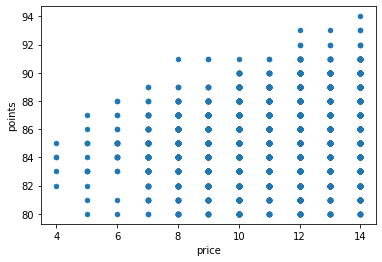

In [6]:
wine_df2 = wine_df
price_df = wine_df2.loc[wine_df2['price'] < int(input("What price?"))]

price_df.plot(kind='scatter',x='price',y='points')
plt.savefig('pricescatter.png')
plt.show()

In [7]:
price_df=wine_df.loc[wine_df['price']<50]
price_df['price']

3         13.0
5         15.0
6         16.0
9         27.0
10        19.0
16        30.0
17        13.0
18        28.0
20        23.0
22        19.0
23        22.0
24        35.0
26        13.0
28        17.0
37        21.0
38        11.0
39        12.0
42         9.0
45        40.0
46        13.0
49        14.0
52        14.0
53        15.0
55        30.0
57        13.0
61        17.0
62        25.0
64        26.0
67        46.0
71        40.0
          ... 
129890    25.0
129895    30.0
129896    36.0
129899    30.0
129902    40.0
129903    27.0
129904    33.0
129909    20.0
129913    44.0
129915    40.0
129917    40.0
129920    48.0
129921    18.0
129925    24.0
129926    41.0
129930    26.0
129938    25.0
129940    36.0
129943    29.0
129945    20.0
129947    20.0
129948    43.0
129949    35.0
129950    35.0
129951    30.0
129957    17.0
129962    40.0
129965    28.0
129968    30.0
129970    21.0
Name: price, Length: 52817, dtype: float64

In [8]:
# Establish the bins 
price_bins = [0, 9.90, 14.90, 19.90, 24.90, 29.90, 34.90, 39.90, 99999]
group_names = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]

# Categorize the existing players using the age bins
wine_df["price_groups"] = pd.cut(wine_df["price"], price_bins, labels=group_names)

wine_df_price=wine_df.groupby(['price_groups']).mean()['points']
wine_df_price.head()

price_groups
<10      84.669211
10-14    85.750581
15-19    86.990667
20-24    87.815502
25-29    88.305810
Name: points, dtype: float64

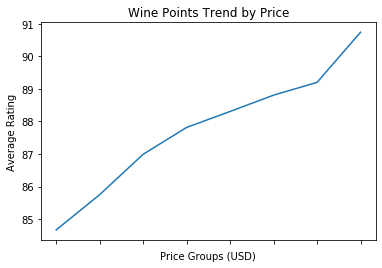

In [9]:
wine_df_price.plot(kind='line',x='price_groups',y='points')
plt.title('Wine Points Trend by Price')
plt.xlabel('Price Groups (USD)')
plt.ylabel('Average Rating')
plt.savefig('winepoints.png')
plt.show()

In [10]:
# wine_df.loc(wine_df['price_groups'] == '10-14')
wine_df["price_groups"].value_counts()

40+      26165
15-19     9750
20-24     8412
25-29     7436
10-14     6459
35-39     5639
30-34     5528
<10        786
Name: price_groups, dtype: int64